In [2]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import statsmodels.api as sm
from datetime import datetime
import mplfinance as mpf
from functools import partial
import matplotlib as mpl

**名称**：synergy\
**来源**：20240319-方正证券-多因子选股系列研究之十六：日内协同股票性价比度量与“协同效应”因子构建\
**构造方法**：\
1.计算个股收益率数据过去5分钟之内高开低收20个价格数据的均值和标准差 data_mean data_std\
2.定义当前分钟价格上下轨（均值+1倍标准差为上轨，均值-1倍标准差为下轨），与该股票相同的股票定义为协同效应股票 up_status、down_status、mid_status\
3.计算协同股票当前1分钟成交量占比之和作为当前分钟该股票协同成交量 data_volume_min\
4。计算个股日内成交量占比序列与协同成交量占比序列相关系数作为日成交协同 corr_result\
5. 过去20天的日成交协同均值和标准差等权合成成交量协同因子 factor


In [3]:
factor = ff.read('synergy')

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


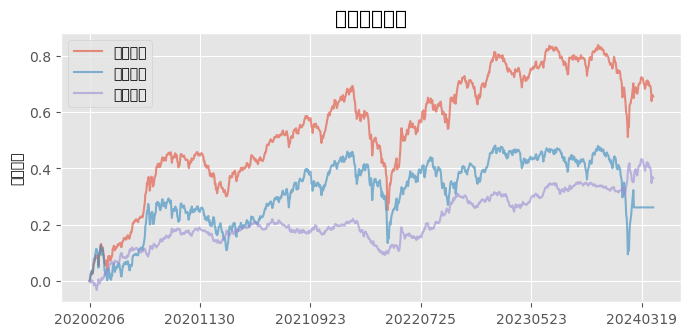

,指数收益,超额收益,策略收益
年化收益率,0.064,0.089,0.160
年化波动率,0.208,0.093,0.193
夏普率,0.307,0.963,0.830
最大回撤,-0.387,-0.128,-0.441
收益回撤比,0.165,0.696,0.364
胜率,0.513,0.520,0.551
盈亏比,1.002,1.088,0.941


(        指数收益   超额收益   策略收益
 年化收益率  0.064  0.089  0.160
 年化波动率  0.208  0.093  0.193
 夏普率    0.307  0.963  0.830
 最大回撤  -0.387 -0.128 -0.441
 收益回撤比  0.165  0.696  0.364
 胜率     0.513  0.520  0.551
 盈亏比    1.002  1.088  0.941,
                 策略     index          策略收益      指数收益      超额收益
 20200206  1.000000  1.000000  6.661338e-16  0.000000  0.000000
 20200207  1.007106  1.011439  7.080873e-03  0.011374 -0.004342
 20200210  1.021083  1.027101  2.086411e-02  0.026740 -0.005950
 20200211  1.026168  1.021528  2.583172e-02  0.021300  0.004402
 20200212  1.036103  1.037904  3.546611e-02  0.037203 -0.001968
 ...            ...       ...           ...       ...       ...
 20240415  1.967038  1.298920  6.765290e-01  0.261533  0.385471
 20240416  1.895104  1.298920  6.392735e-01  0.261533  0.348216
 20240417  1.937269  1.298920  6.612795e-01  0.261533  0.370222
 20240418  1.935928  1.298920  6.605866e-01  0.261533  0.369529
 20240419  1.927232  1.298920  6.560848e-01  0.261533  0.365027
 
 [102

In [4]:
ff.run(factor*ff.filter0, positions = 100, period = 1, fees = 0) 